In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [2]:
api_key = 'XXXXXXXX'
# channel_id = 'UCjWY5hREA6FFYrthD0rZNIw'  # krish naik hindi
channel_id = ['UCGs86U1KK-KMtk-Dzj627Cw',  # CodeGenius316
              'UCvEKHATlVq84hm1jduTYm8g',  # Striver
              'UCJskGeByzRRSvmOyZOz61ig',  # takeUforward
              'UCCWi3hpnq_Pe03nGxuS7isg',  # CampusX
              'UCk7NcgnqCmui1AV7MTXZwOw'  # Ankit Bansal
]

youtube = build('youtube', 'v3', developerKey=api_key)

In [3]:
# Function for finding channel id of a channel using channel name

# Create a resource object for interacting with the API
youtube = build('youtube', 'v3', developerKey=api_key)

# Replace with the username of the channel
channel_name = "@ankitbansal6"


# Request the channel details
request = youtube.search().list(
    part="snippet",
    q=channel_name,
    type="channel"
)
response = request.execute()

# Print the channel ID
if "items" in response and len(response["items"]) > 0:
    channel_id = response["items"][0]["snippet"]["channelId"]
    print(f"Channel ID: {channel_id}")
else:
    print("Channel not found")

Channel ID: UCk7NcgnqCmui1AV7MTXZwOw


Function to get channel statistics

In [3]:
def get_channel_statistics(youtube, channel_id):

    all_data = []

    request = youtube.channels().list(
        part = 'snippet, contentDetails,statistics',
        id = ','.join(channel_id)
    )
    
    response = request.execute()

    for i in range (len(response['items'])):
        data = dict(channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    views = response['items'][i]['statistics']['viewCount'],
                    total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return all_data


In [4]:
# Storing all the youtube channel data in a list
channel_stats = get_channel_statistics(youtube, channel_id)

In [5]:
# converting it into a pandas dataframe
channel_data = pd.DataFrame(channel_stats)

In [6]:
channel_data

,channel_name,Subscribers,views,total_videos,playlist_id
0,take U forward,613000,82944420,533,UUJskGeByzRRSvmOyZOz61ig
1,CampusX,216000,23768171,1188,UUCWi3hpnq_Pe03nGxuS7isg
2,Striver,243000,8678411,85,UUvEKHATlVq84hm1jduTYm8g
3,CodeGenius,941,59762,120,UUGs86U1KK-KMtk-Dzj627Cw
4,Ankit Bansal,108000,4435389,191,UUk7NcgnqCmui1AV7MTXZwOw


In [7]:
# We need to convert the data type of each column accordingly
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['views'] = pd.to_numeric(channel_data['views'])
channel_data['total_videos'] = pd.to_numeric(channel_data['total_videos'])
channel_data.dtypes

channel_name    object
Subscribers      int64
views            int64
total_videos     int64
playlist_id     object
dtype: object

In [18]:
channel_data

,channel_name,Subscribers,views,total_videos,playlist_id
0,take U forward,613000,82944420,533,UUJskGeByzRRSvmOyZOz61ig
1,CampusX,216000,23768171,1188,UUCWi3hpnq_Pe03nGxuS7isg
2,Striver,243000,8678411,85,UUvEKHATlVq84hm1jduTYm8g
3,CodeGenius,941,59762,120,UUGs86U1KK-KMtk-Dzj627Cw
4,Ankit Bansal,108000,4435389,191,UUk7NcgnqCmui1AV7MTXZwOw


In [19]:
channel_data.dtypes

channel_name    object
Subscribers      int64
views            int64
total_videos     int64
playlist_id     object
dtype: object

Visualising the data

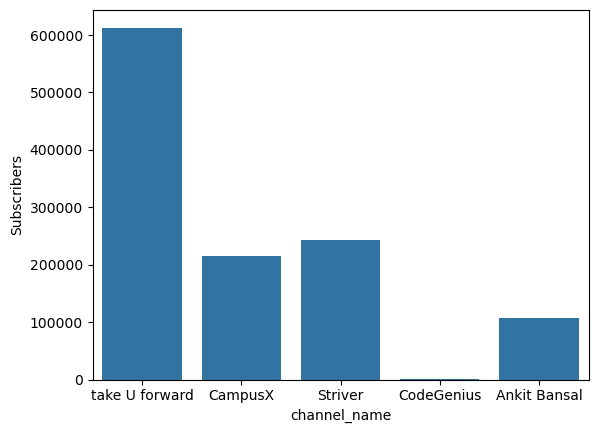

In [20]:
# sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='channel_name', y = 'Subscribers', data=channel_data)

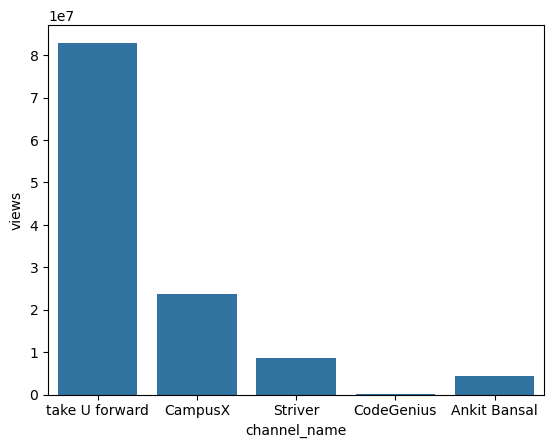

In [21]:
ax = sns.barplot(x='channel_name', y = 'views', data=channel_data)

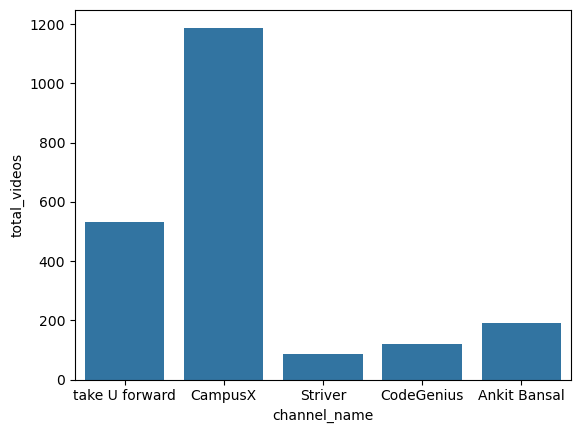

In [22]:
ax = sns.barplot(x='channel_name', y = 'total_videos', data=channel_data)

Scrape , Analysis and Visualise video details

In [29]:
channel_data

,channel_name,Subscribers,views,total_videos,playlist_id
0,take U forward,613000,82944420,533,UUJskGeByzRRSvmOyZOz61ig
1,CampusX,216000,23768171,1188,UUCWi3hpnq_Pe03nGxuS7isg
2,Striver,243000,8678411,85,UUvEKHATlVq84hm1jduTYm8g
3,CodeGenius,941,59762,120,UUGs86U1KK-KMtk-Dzj627Cw
4,Ankit Bansal,108000,4435389,191,UUk7NcgnqCmui1AV7MTXZwOw


In [30]:
playlist_id = channel_data.loc[channel_data['channel_name'] == 'take U forward', 'playlist_id'].iloc[0]

In [31]:
playlist_id

'UUJskGeByzRRSvmOyZOz61ig'

In [32]:
# Function to get the video ids
def get_video_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
        part = 'contentDetails',
        playlistId = playlist_id,
        maxResults = 50
    )
    response = request.execute()

    video_id = []

    for i in range(len(response['items'])):
        video_id.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while(more_pages):
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
            part = 'contentDetails',
            playlistId = playlist_id,
            maxResults = 50,
            pageToken = next_page_token
            )
            response = request.execute()

            for i in range(len(response['items'])):
                video_id.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')



    return video_id

In [33]:
video_id = get_video_ids(youtube, playlist_id)

In [77]:
# Function to get video details
def get_video_details(youtube, video_ids):

    all_video_stats = []

    for i in range(0,len(video_ids),50):
        request = youtube.videos().list(
            part = 'snippet,statistics',
            id = ','.join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response['items']:
            video_stats = dict(
                channel_title = video['snippet']['channelTitle'],
                Title=video['snippet']['title'],
                Description=video['snippet']['description'],
                Published_date=video['snippet']['publishedAt'],
                Views=video['statistics'].get('viewCount', 0),
                Likes=video['statistics'].get('likeCount', 0),
                # Dislikes=video['statistics'].get('dislikeCount', 0),  # Dislikes are no longer publicly available
                Comments=video['statistics'].get('commentCount', 0),
            )
            all_video_stats.append(video_stats)

    return all_video_stats



In [78]:
video_details = get_video_details(youtube, video_id)
# video_details

In [80]:
video_data = pd.DataFrame(video_details)

In [81]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Comments'] = pd.to_numeric(video_data['Comments'])
video_data

,channel_title,Title,Description,Published_date,Views,Likes,Comments
0,take U forward,L18. Implement LRU Cache,"Find problem link, notes under Step 9: https:/...",2024-07-16,4221,117,31
1,take U forward,L17. The Celebrity Problem | Stack and Queue P...,"Find problem link, notes under Step 9: https:/...",2024-07-16,1514,66,12
2,take U forward,L16. Sliding Window Maximum | Stack and Queue ...,"Find problem link, notes under Step 9: https:/...",2024-07-16,987,43,3
3,take U forward,L15. Stock Span Problem | Stack and Queue Play...,"Find problem link, notes under Step 9: https:/...",2024-07-16,1063,42,6
4,take U forward,L14. Remove K Digits | Stack and Queue Playlist,"Find problem link, notes under Step 9: https:/...",2024-07-16,990,40,3
...,...,...,...,...,...,...,...
529,take U forward,How to get an internship at Amazon | Internshi...,Check our Website: https://www.takeuforward.or...,2020-04-09,132039,7557,261
530,take U forward,How to approach people at Linkedin | How to bu...,Check our Website: https://www.takeuforward.or...,2020-04-04,32377,2707,74
531,take U forward,Experience with Scaler Academy | More insights...,Check our Website: https://www.takeuforward.or...,2020-04-01,180717,0,623
532,take U forward,Longest Increasing Subsequence NlogN approach,Check our Website: https://www.takeuforward.or...,2020-03-29,69521,1872,141


In [82]:
# Identifying the top 10 videos
top_10_videos = video_data.sort_values(by='Views',ascending=False).head(10)
top_10_videos

,channel_title,Title,Description,Published_date,Views,Likes,Comments
303,take U forward,Re 1. Introduction to Recursion | Recursion Tr...,Check our Website: https://www.takeuforward.or...,2021-12-25,1289563,22892,480
296,take U forward,Striver's Dynamic Programming Series | The ULT...,Check our Website: https://www.takeuforward.or...,2022-01-07,1086725,6603,156
170,take U forward,C++ Basics in One Shot - Strivers A2Z DSA Cour...,Avail Exclusive discounts on Coding Ninjas Cou...,2022-12-19,1080202,21954,1097
162,take U forward,Find Second Largest Element in Array | Remove ...,Notes/C++/Java/Python codes in Step 3.1 of htt...,2023-03-01,952194,14876,755
226,take U forward,G-1. Introduction to Graph | Types | Different...,Notes Link: https://takeuforward.org/graph/int...,2022-08-04,914653,13206,493
227,take U forward,Complete C++ STL in 1 Video | Time Complexity ...,Complete Notes: https://takeuforward.org/c/c-s...,2022-06-04,892374,18344,1647
168,take U forward,Solve any Pattern Question - Trick Explained |...,Full Course: https://takeuforward.org/strivers...,2023-01-02,890621,16239,1110
295,take U forward,DP 1. Introduction to Dynamic Programming | Me...,Lecture Notes: https://takeuforward.org/data-s...,2022-01-08,851696,26747,3130
161,take U forward,"Rotate Array by K places | Union, Intersection...",Notes/C++/Java/Python codes in Step 3.1 of htt...,2023-03-05,608470,11413,773
302,take U forward,Re 2. Problems on Recursion | Strivers A2Z DSA...,Check our Website: https://www.takeuforward.or...,2021-12-25,577867,14617,1087


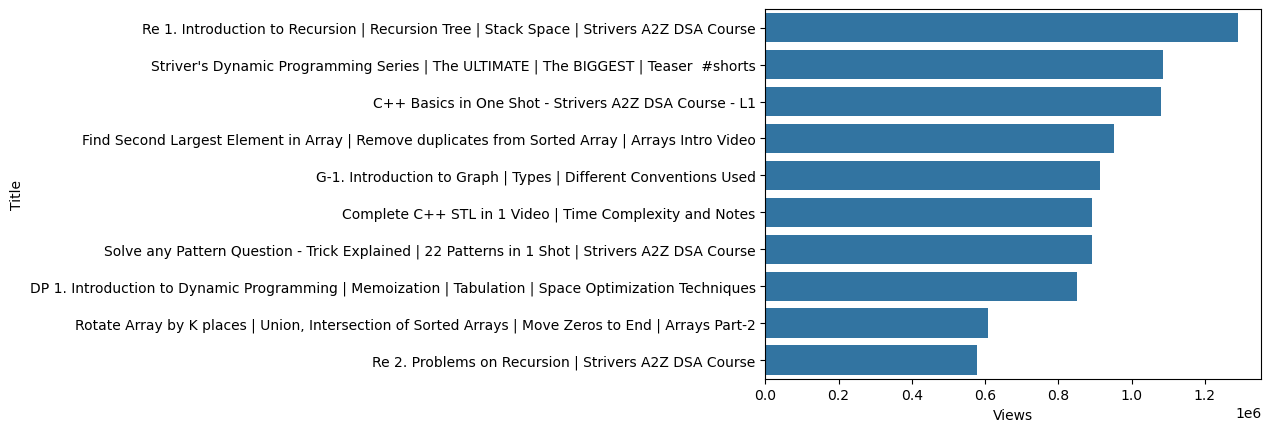

In [83]:
ax1 = sns.barplot(x = 'Views', y = 'Title', data = top_10_videos)

In [84]:
# Mothly how many videos are getiing posted
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [85]:
video_data

,channel_title,Title,Description,Published_date,Views,Likes,Comments,Month
0,take U forward,L18. Implement LRU Cache,"Find problem link, notes under Step 9: https:/...",2024-07-16,4221,117,31,Jul
1,take U forward,L17. The Celebrity Problem | Stack and Queue P...,"Find problem link, notes under Step 9: https:/...",2024-07-16,1514,66,12,Jul
2,take U forward,L16. Sliding Window Maximum | Stack and Queue ...,"Find problem link, notes under Step 9: https:/...",2024-07-16,987,43,3,Jul
3,take U forward,L15. Stock Span Problem | Stack and Queue Play...,"Find problem link, notes under Step 9: https:/...",2024-07-16,1063,42,6,Jul
4,take U forward,L14. Remove K Digits | Stack and Queue Playlist,"Find problem link, notes under Step 9: https:/...",2024-07-16,990,40,3,Jul
...,...,...,...,...,...,...,...,...
529,take U forward,How to get an internship at Amazon | Internshi...,Check our Website: https://www.takeuforward.or...,2020-04-09,132039,7557,261,Apr
530,take U forward,How to approach people at Linkedin | How to bu...,Check our Website: https://www.takeuforward.or...,2020-04-04,32377,2707,74,Apr
531,take U forward,Experience with Scaler Academy | More insights...,Check our Website: https://www.takeuforward.or...,2020-04-01,180717,0,623,Apr
532,take U forward,Longest Increasing Subsequence NlogN approach,Check our Website: https://www.takeuforward.or...,2020-03-29,69521,1872,141,Mar


In [86]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [87]:
videos_per_month

,Month,size
0,Apr,67
1,Aug,74
2,Dec,17
3,Feb,30
4,Jan,30
5,Jul,33
6,Jun,40
7,Mar,70
8,May,54
9,Nov,38


In [88]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

In [89]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [90]:
videos_per_month = videos_per_month.sort_index()

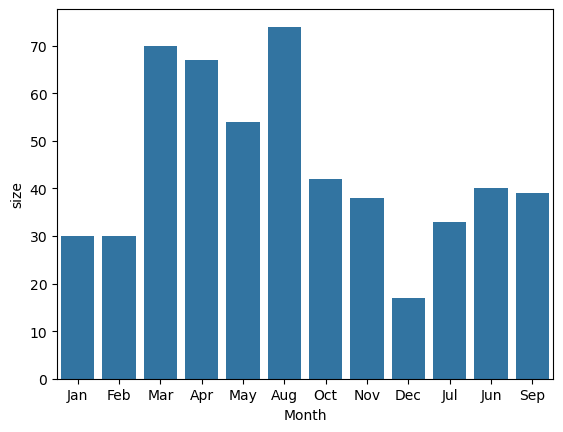

In [91]:
ax2 = sns.barplot(x = 'Month', y = 'size', data = videos_per_month)

In [92]:
video_data.to_csv('takeUforward_videos.csv')

In [93]:
video_data = pd.read_csv('takeUforward_videos.csv')

<Axes: xlabel='channel_title', ylabel='Views'>

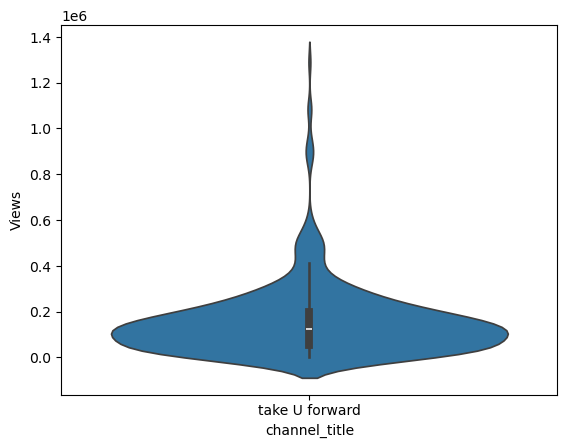

In [94]:
# Visualising the view distribution of a channel
sns.violinplot(x ='channel_title', y = 'Views',data=video_data)

<Axes: xlabel='Likes', ylabel='Views'>

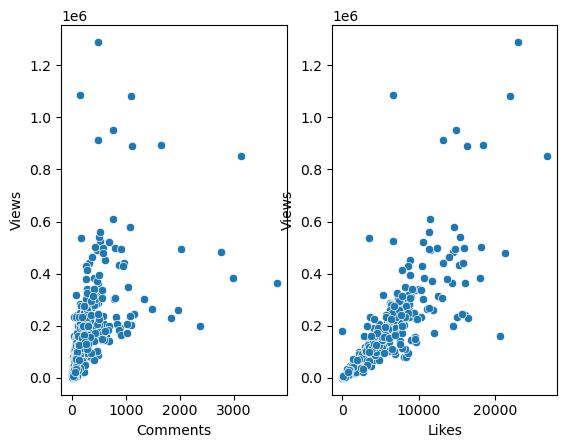

In [109]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_data, x = "Comments", y = "Views", ax=ax[0])
sns.scatterplot(data = video_data, x = "Likes", y = "Views", ax=ax[1])


In [95]:
# Get channel comments
def get_comments_in_videos(youtube, video_ids):
    """
    Get top level comments as text from all videos with given IDs (only the first 10 comments due to quote limit of Youtube API)
    Params:
    
    youtube: the build object from googleapiclient.discovery
    video_ids: list of video IDs
    
    Returns:
    Dataframe with video IDs and associated top level comment in text.
    
    """
    all_comments = []
    
    for video_id in video_ids:
        try:   
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()
        
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments)     

In [96]:
comments_data = get_comments_in_videos(youtube, video_id)

Could not get comments for video AZOmHuHadxQ
Could not get comments for video yJ-G3t0rSUU


In [97]:
comments_data

,video_id,comments
0,z9bJUPxzFOw,[Bhaiya could you tell beforehand if you going...
1,cEadsbTeze4,[easy problem only thing to evaluate that ther...
2,NwBvene4Imo,"[Good post, slow down the releases and you’ll ..."
3,eay-zoSRkVc,[What a timing. I was solving this problem fro...
4,jmbuRzYPGrg,"[So many edge cases.........Uffffff, , Great s..."
...,...,...
527,GAuI71n71Uc,"[😮, whenever i feel like i can't do it, i watc..."
528,Cq_G2kk15U0,[others : how to approach girls on insta \nle ...
529,SWABtcS8SU8,[The video received 200+ Likes and 10 dislikes...
530,TocJOW6vx_I,[The program is to find the length and not the...


In [99]:
comments_data.to_csv('comments_data.csv')